<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/Exercicios/Aula6_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 6 - Exercícios - Pandas e Fontes de dados

In [ ]:
!pip install --upgrade ipynb_autograde 1> /dev/null

In [1]:

%env  COURSE=mba_enap
from ipynb_autograde.main import init_log, validate
init_log()
email_result=!gcloud config get-value account
if not email_result or 'unset' in email_result[0]:
  !gcloud auth login

env: COURSE=mba_enap


In [14]:
# Importe as bibliotecas pandas, numpy
import pandas as pd
import numpy as np
from numpy import nan

### 6.1 Crie um prompt de uma função python para calcular a média do IDEB de 2017, de uma determinada UF e da Rede Municipal.

#### Entrada: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/ideb/ideb_municipios2017.xlsx``` e ```'GO'```

#### Resultado esperado: ```4.0```

#### Entrada: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/ideb/ideb_municipios2017.xlsx``` e ```'SC'```

#### Resultado esperado: ```4.5```

#### Entrada: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/ideb/ideb_municipios2017.xlsx``` e ```'SP'```

#### Resultado esperado: ```4.9```

In [18]:
prompt61="""Crie uma função em Python chamada calcular_media_ideb que calcula a média do IDEB de 2017 para escolas públicas de um estado específico cuja URL do xlsx foi passada como argumento da função, juntamente com a sigla da UF. A função deve carregar o DataFrame, descartar as 9 primeiras linhas. Substituir valores ausentes representados por '-' por NaN e filtrar os dados apenas para escolas municipal cuja Rede (coluna de índice 3) seja igual a 'Municipal' e cuja UF (1a coluna) seja igual ao argumento uf passado na função. Calcule a média da coluna de índice 14 considerando e retorne o valor arredondado para baixo com uma casa decimal."""

In [19]:
validate(prompt61, "A6-E1")

Codigo gerado: 
{'code': "def calcular_media_ideb(url, uf):\n    # Carregar o DataFrame ignorando as primeiras 9 linhas\n    df = pd.read_excel(url, skiprows=9)\n    \n    # Substituir '-' por NaN\n    df.replace('-', np.nan, inplace=True)\n    \n    # Filtrar para escolas municipais da UF específica\n    df_filtrado = df[(df.iloc[:, 3] == 'Municipal') & (df.iloc[:, 0] == uf)]\n    \n    # Converter a coluna de índice 14 para float e calcular a média\n    media = df_filtrado.iloc[:, 14].astype(float).mean()\n    \n    # Arredondar para baixo com uma casa decimal\n    media_arredondada = math.floor(media * 10) / 10\n    \n    return media_arredondada\n", 'status': 'success', 'summary': {'passed_tests': 3, 'success_rate': '100.00%', 'total_tests': 3}, 'test_results': [{'actual': 4.5, 'error': None, 'expected': 4.5, 'passed': True, 'testcase_id': '1'}, {'actual': 4.9, 'error': None, 'expected': 4.9, 'passed': True, 'testcase_id': '2'}, {'actual': 4.0, 'error': None, 'expected': 4.0, 'pass

### 6.2 Crie um prompt de uma função python para distribuir pessoas de forma aleatoria em grupos conforme o exemplo a seguir. O 1o argumento é a lista de nomes, o 2o é uma semente (para garantir a replicabilidade do experimento) e o 3o é o tamanho do grupo.

#### Entrada: ```["Lisa Watson", "Gilbert Ravenell", "Olga Crocker", "Julie Lewis", "Kimberly Ransome", "Jennifer Daniels", "Jillian Brennan", "Mary Phinney", "Michelle Humphreys"]```, ```42``` e ```4```

#### Resultado esperado:
Um dataframe exatamente igual a esse

|    | Grupo   | Nome               |
|---:|:--------|:-------------------|
|  0 | Grupo 1 | Julie Lewis        |
|  1 | Grupo 1 | Jillian Brennan    |
|  2 | Grupo 1 | Mary Phinney       |
|  3 | Grupo 1 | Kimberly Ransome   |
|  4 | Grupo 2 | Michelle Humphreys |
|  5 | Grupo 2 | Olga Crocker       |
|  6 | Grupo 2 | Jennifer Daniels   |
|  7 | Grupo 2 | Lisa Watson        |
|  8 | Grupo 3 | Gilbert Ravenell   |





In [7]:
prompt62="""Escreva uma função para gerar uma permutação (aleatória) de uma lista, passada como argumento, usando um seed (2o argumento) para garantir a replicabilidade dos experimentos e colocar o resultado essa lista reordenada na 2a coluna do dataframe, a coluna deve se chamar chamada Nome. A 1a coluna do dataframe deve ser criada contendo o padrão "Grupo X" repetido N vezes, N é o 3o argumento da função e representa o tamanho do grupo, e X deve variar de 1 a até len(lista)/N, se não houver resto da divisão len(lista)/N, ou então X terá o valor máximo de len(lista)/N + 1, caso a divisão não seja inteira."""

In [10]:
validate(prompt62, "A6-E2")

Codigo gerado: 
{'code': 'def gerar_dataframe_permutacao(lista, seed, N):\n    random.seed(seed)\n    permuted_list = lista.copy()\n    random.shuffle(permuted_list)\n    \n    total_items = len(lista)\n    number_of_groups = total_items // N + (1 if total_items % N != 0 else 0)\n    \n    grupos = ["Grupo {}".format(i+1) for i in range(number_of_groups) for _ in range(N)]\n    grupos = grupos[:total_items]\n    \n    df = pd.DataFrame({\n        \'Grupo\': grupos,\n        \'Nome\': permuted_list\n    })\n    \n    return df\n', 'status': 'success', 'summary': {'passed_tests': 1, 'success_rate': '100.00%', 'total_tests': 1}, 'test_results': [{'actual': {'aggregation_summary': {'means': {}, 'sums': {}, 'total_rows': {'max': 9, 'min': 9}}, 'verified_samples': [{'expected_values': {'Nome': 'Gilbert Ravenell'}, 'filter': {'Grupo': 'Grupo 3'}}]}, 'error': [], 'expected': {'aggregation_summary': {'means': {}, 'sums': {}, 'total_rows': {'max': 9, 'min': 9}}, 'verified_samples': [{'expected_v

### 6.3 Crie um prompt de uma função python para carregar **corretamente** o dataframe de população disponibilizado. Faça as transformações necessárias para deixar o dataframe conforme a imagem a seguir.

#### Entrada: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/populacao/POP2024_20241101.xls````

#### Resultado esperado:
Um dataframe exatamente igual a este. Atente para os detalhes destacados em amarelo. Eles são alguns dos detalhes checados.

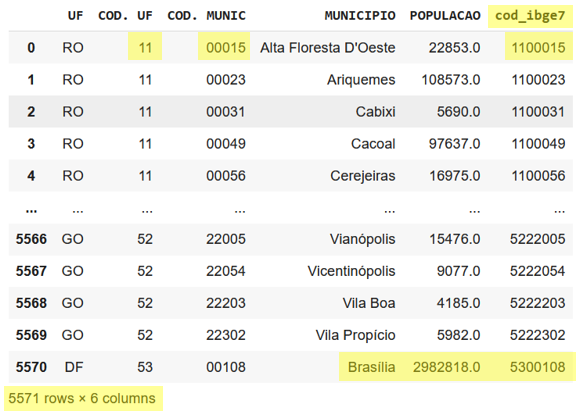

In [16]:
prompt63="""Escreva uma função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como argumento. O código deve:
    Ler a planilha chamada 'MUNICÍPIOS', ignorando a primeira linha e interpretando as colunas 'COD. UF' e 'COD. MUNIC' como string;
    Remover a última coluna do DataFrame;
    Alterar o nome duas últimas colunas para 'MUNICIPIO' e 'POPULACAO', respectivamente;
    Criar uma nova coluna chamada 'cod_ibge7', concatenando 'COD. UF' e 'COD. MUNIC';
    Excluir as últimas 40 linhas do DataFrame;
    Retornar o dataframe resultante."""

In [17]:
validate(prompt63, "A6-E3")


Codigo gerado: 
{'code': "def carregar_municipios(url):\n    df = pd.read_excel(url, sheet_name='MUNICÍPIOS', skiprows=1, dtype={'COD. UF': str, 'COD. MUNIC': str})\n    df = df.iloc[:, :-1]\n    df.rename(columns={df.columns[-2]: 'MUNICIPIO', df.columns[-1]: 'POPULACAO'}, inplace=True)\n    df['cod_ibge7'] = df['COD. UF'] + df['COD. MUNIC']\n    df = df.iloc[:-40]\n    return df\n", 'status': 'success', 'summary': {'passed_tests': 1, 'success_rate': '100.00%', 'total_tests': 1}, 'test_results': [{'actual': {'aggregation_summary': {'means': {'POPULACAO': 38158.9}, 'sums': {'POPULACAO': 212583750.0}, 'total_rows': {'max': 5571, 'min': 5571}}, 'verified_samples': [{'expected_values': {'POPULACAO': 2982818}, 'filter': {'UF': 'DF'}}, {'expected_values': {'POPULACAO': 22853}, 'filter': {'cod_ibge7': '1100015'}}]}, 'error': [], 'expected': {'data': {'aggregation_checks': {'mean': {'POPULACAO': 38158.9}, 'sum': {'POPULACAO': 212583750.0}, 'total_rows': {'max': 5571, 'min': 5571}}, 'columns': 

### 6.4 Realize a operação representada pelos tabelas abaixo.

#### Dataframe de entrada:
|    | Município                      |     1991 |   2000 |   2010 |
|---:|:-------------------------------|---------:|-------:|-------:|
|  0 | 110001 Alta Floresta D'Oeste   |   0.5983 | 0.5868 | 0.5893 |
|  1 | 110037 Alto Alegre dos Parecis | NaN     | 0.508  | 0.5491 |
|  2 | 110040 Alto Paraíso            | NaN     | 0.6256 | 0.5417 |
|  3 | 110034 Alvorada D'Oeste        |   0.569  | 0.6534 | 0.5355 |
|  4 | 110002 Ariquemes               |   0.5827 | 0.5927 | 0.5496 |

#### Resultado esperado:
|    | Município                      |   data |     gini |
|---:|:-------------------------------|-------:|---------:|
|  0 | 110001 Alta Floresta D'Oeste   |   1991 |   0.5983 |
|  1 | 110037 Alto Alegre dos Parecis |   1991 | NaN     |
|  2 | 110040 Alto Paraíso            |   1991 | NaN     |
|  3 | 110034 Alvorada D'Oeste        |   1991 |   0.569  |
|  4 | 110002 Ariquemes               |   1991 |   0.5827 |
|  5 | 110001 Alta Floresta D'Oeste   |   2000 |   0.5868 |
|  6 | 110037 Alto Alegre dos Parecis |   2000 |   0.508  |
|  7 | 110040 Alto Paraíso            |   2000 |   0.6256 |
|  8 | 110034 Alvorada D'Oeste        |   2000 |   0.6534 |
|  9 | 110002 Ariquemes               |   2000 |   0.5927 |
| 10 | 110001 Alta Floresta D'Oeste   |   2010 |   0.5893 |
| 11 | 110037 Alto Alegre dos Parecis |   2010 |   0.5491 |
| 12 | 110040 Alto Paraíso            |   2010 |   0.5417 |
| 13 | 110034 Alvorada D'Oeste        |   2010 |   0.5355 |
| 14 | 110002 Ariquemes               |   2010 |   0.5496 |

In [ ]:
def unpivot_gini(df):
    """retorne um dataframe despivotado.
    """
    ### BEGIN SOLUTION
    return df.melt(id_vars=['Município'], var_name='data', value_name='gini')
    ### END SOLUTION


In [ ]:
# Faça seus testes aqui
dataset_gini = {'Município': {0: "110001 Alta Floresta D'Oeste",
  1: '110037 Alto Alegre dos Parecis',
  2: '110040 Alto Paraíso',
  3: "110034 Alvorada D'Oeste",
  4: '110002 Ariquemes'},
 '1991': {0: 0.5983, 1: None, 2: None, 3: 0.569, 4: 0.5827},
 '2000': {0: 0.5868, 1: 0.508, 2: 0.6256, 3: 0.6534, 4: 0.5927},
 '2010': {0: 0.5893, 1: 0.5491, 2: 0.5417, 3: 0.5355, 4: 0.5496}}
df_gini = pd.DataFrame(dataset_gini)
df_gini

In [ ]:
# Validação
dataset_gini = {'Município': {0: "110001 Alta Floresta D'Oeste",
  1: '110037 Alto Alegre dos Parecis',
  2: '110040 Alto Paraíso',
  3: "110034 Alvorada D'Oeste",
  4: '110002 Ariquemes'},
 '1991': {0: 0.5983, 1: None, 2: None, 3: 0.569, 4: 0.5827},
 '2000': {0: 0.5868, 1: 0.508, 2: 0.6256, 3: 0.6534, 4: 0.5927},
 '2010': {0: 0.5893, 1: 0.5491, 2: 0.5417, 3: 0.5355, 4: 0.5496}}
df_gini = pd.DataFrame(dataset_gini)

test_data = {'Município': {0: "110001 Alta Floresta D'Oeste", 1: '110037 Alto Alegre dos Parecis',
  2: '110040 Alto Paraíso',  3: "110034 Alvorada D'Oeste", 4: '110002 Ariquemes', 5: "110001 Alta Floresta D'Oeste",
  6: '110037 Alto Alegre dos Parecis', 7: '110040 Alto Paraíso', 8: "110034 Alvorada D'Oeste", 9: '110002 Ariquemes',
  10: "110001 Alta Floresta D'Oeste", 11: '110037 Alto Alegre dos Parecis', 12: '110040 Alto Paraíso',
  13: "110034 Alvorada D'Oeste", 14: '110002 Ariquemes'}, 'data': {0: '1991', 1: '1991', 2: '1991', 3: '1991',
  4: '1991', 5: '2000', 6: '2000', 7: '2000', 8: '2000', 9: '2000', 10: '2010', 11: '2010', 12: '2010', 13: '2010',
  14: '2010'},'gini': {0: 0.5983, 1: nan, 2: nan, 3: 0.569, 4: 0.5827, 5: 0.5868, 6: 0.508, 7: 0.6256, 8: 0.6534,
  9: 0.5927, 10: 0.5893, 11: 0.5491, 12: 0.5417, 13: 0.5355, 14: 0.5496}}

entradas = [[df_gini]]
saidas = [pd.DataFrame(test_data)]
validate(unpivot_gini, entradas, lambda x: x, saidas, "6.4", False)